In [40]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
from mpl_toolkits.basemap import Basemap
from pylab import rcParams
import pandas as pd

%matplotlib inline

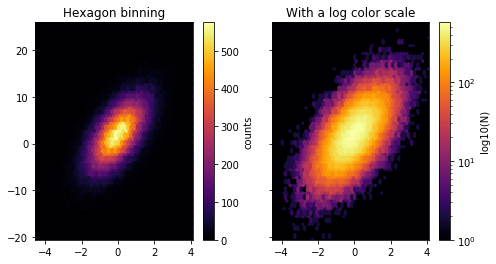

In [3]:
# Fixing random state for reproducibility
np.random.seed(19680801)

n = 100000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

In [9]:
xlat = np.loadtxt('../datos/xlat_d02_interpolado.txt')
xlong = np.loadtxt('../datos/xlong_d02_interpolado.txt')

In [26]:
maxs = np.loadtxt('../datos/max_min_anual/max_annual.dat')
mins = np.loadtxt('../datos/max_min_anual/min_annual.dat')

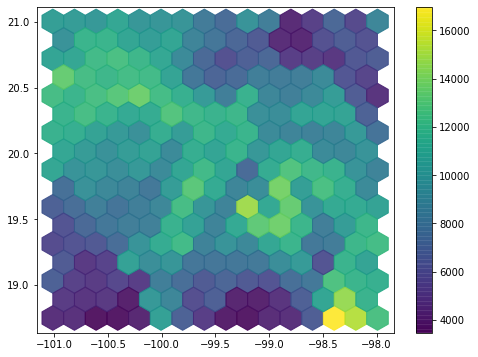

In [39]:
plt.figure(figsize = (8,6))
plt.hexbin(np.reshape(xlong, 102*128), np.reshape(xlat, 102*128), C = np.reshape(maxs, 102*128), gridsize=15, alpha = 0.9)
plt.colorbar()

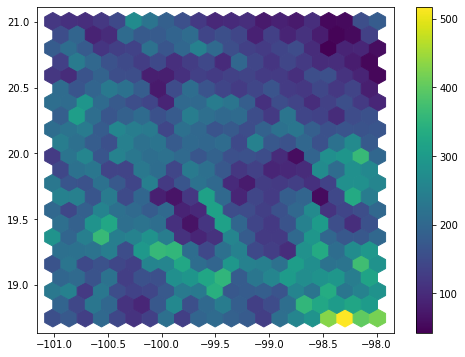

In [52]:
plt.figure(figsize = (8,6))
plt.hexbin(np.reshape(xlong, 102*128), np.reshape(xlat, 102*128), C = np.reshape(mins, 102*128), 
           gridsize=20, alpha = 1)
plt.colorbar()

http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=-380706.6996369655,2114030.0354140634,-304052.2035350525,2189220.929094869&bboxSR=2025&imageSR=2025&size=1500,1471&dpi=96&format=png32&transparent=true&f=image


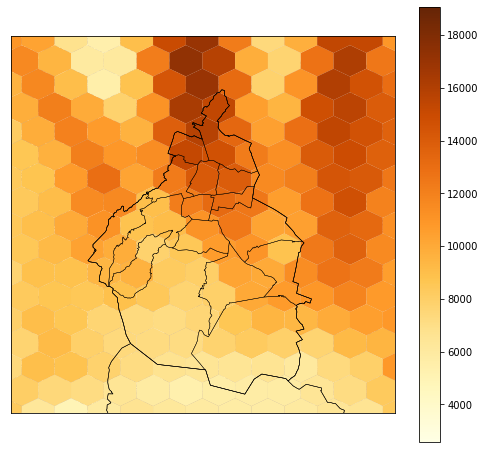

In [58]:
plt.figure(figsize = (8.6,8))
my_map = Basemap(llcrnrlon=-99.5, llcrnrlat=19,urcrnrlon=-98.8, urcrnrlat=19.7, epsg = 2025)
#http://server.arcgisonline.com/arcgis/rest/services

my_map.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)

my_map.readshapefile('../datos/maps/entidades/INEGI_Entidad_', 'INEGI_Entidad_')
my_map.readshapefile('../datos/maps/entidades/INEGI_Municipio_', 'INEGI_Municipio_', drawbounds=False)


for info, shape in zip(my_map.INEGI_Municipio__info, my_map.INEGI_Municipio_):
    if info['NOMBRE'][:6] == 'Ciudad':
        x, y = zip(*shape) 
        my_map.plot(x, y, marker=None, c = 'k', linewidth = 0.4)
        
        
lons = np.reshape(xlong, 102*128)
lats = np.reshape(xlat, 102*128)

    
x,y = my_map(lons, lats)
#my_map.plot(x, y, 'bo', markersize=10)

my_map.hexbin(x,y, C = np.reshape(maxs, 102*128), gridsize=50, alpha = 1, mincnt=1, cmap='YlOrBr', linewidths=0)
plt.colorbar()    



http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=-380706.6996369655,2114030.0354140634,-304052.2035350525,2189220.929094869&bboxSR=2025&imageSR=2025&size=1500,1471&dpi=96&format=png32&transparent=true&f=image


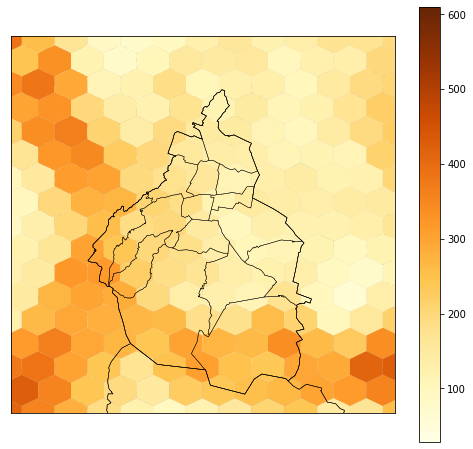

In [59]:
plt.figure(figsize = (8.6,8))
my_map = Basemap(llcrnrlon=-99.5, llcrnrlat=19,urcrnrlon=-98.8, urcrnrlat=19.7, epsg = 2025)
#http://server.arcgisonline.com/arcgis/rest/services

my_map.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)

my_map.readshapefile('../datos/maps/entidades/INEGI_Entidad_', 'INEGI_Entidad_')
my_map.readshapefile('../datos/maps/entidades/INEGI_Municipio_', 'INEGI_Municipio_', drawbounds=False)


for info, shape in zip(my_map.INEGI_Municipio__info, my_map.INEGI_Municipio_):
    if info['NOMBRE'][:6] == 'Ciudad':
        x, y = zip(*shape) 
        my_map.plot(x, y, marker=None, c = 'k', linewidth = 0.4)
        
        
lons = np.reshape(xlong, 102*128)
lats = np.reshape(xlat, 102*128)

    
x,y = my_map(lons, lats)
#my_map.plot(x, y, 'bo', markersize=10)

my_map.hexbin(x,y, C = np.reshape(mins, 102*128), gridsize=50, alpha = 1, mincnt=1, cmap='YlOrBr', linewidths=0)
plt.colorbar()    



In [123]:
znvm_df = pd.read_csv('../datos/municipios_edomex.csv')

In [124]:
znvm_df.head()

,municipios,estado
0,Huixquilucan,Estado de México
1,Naucalpan de Juárez,Estado de México
2,Atizapán de Zaragoza,Estado de México
3,Cuautitlán Izcalli,Estado de México
4,Tlalnepantla de Baz,Estado de México


In [125]:
if 'Tizayuca' in znvm_df.municipios.values:
    print('ehh!')

http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=-380706.6996369655,2114030.0354140634,-281894.57041477715,2221841.553238375&bboxSR=2025&imageSR=2025&size=1500,1636&dpi=96&format=png32&transparent=true&f=image


{-99.5: ([<matplotlib.lines.Line2D at 0x12f8a3b70>],
  [Text(98.81212922218837, -1176.3053247689616, '99.5°W')]),
 -99.3: ([<matplotlib.lines.Line2D at 0x12f8a3390>],
  [Text(21244.6077827705, -1176.3053247689616, '99.3°W')]),
 -99.1: ([<matplotlib.lines.Line2D at 0x12f8a3e80>],
  [Text(42390.40343631881, -1176.3053247689616, '99.1°W')]),
 -98.89999999999999: ([<matplotlib.lines.Line2D at 0x12f8cc1d0>],
  [Text(63635.01121908931, -1176.3053247689616, '98.9°W')]),
 -98.69999999999999: ([<matplotlib.lines.Line2D at 0x12f8cc4e0>],
  [Text(84780.80687263762, -1176.3053247689616, '98.7°W')])}

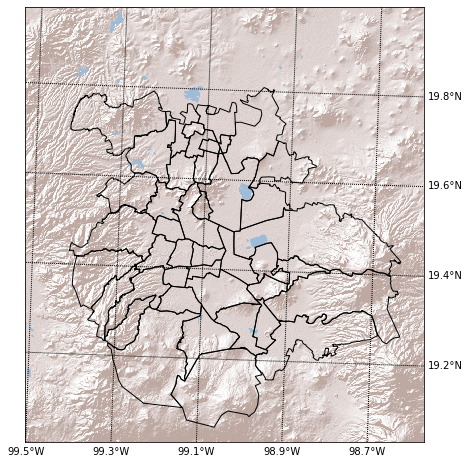

In [142]:
plt.figure(figsize = (8.6,8))
my_map = Basemap(llcrnrlon=-99.5, llcrnrlat=19,urcrnrlon=-98.6, urcrnrlat=20, epsg = 2025)
#http://server.arcgisonline.com/arcgis/rest/services

my_map.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)

#my_map.readshapefile('../datos/maps/entidades/INEGI_Entidad_', 'INEGI_Entidad_')
my_map.readshapefile('../datos/maps/entidades/INEGI_Municipio_', 'INEGI_Municipio_', drawbounds=False)


for info, shape in zip(my_map.INEGI_Municipio__info, my_map.INEGI_Municipio_):
    idx_1 = info['NOMBRE'].find(', ') + 2
    
    if info['NOMBRE'][:6] == 'Ciudad':
        x, y = zip(*shape) 
        my_map.plot(x, y, marker=None, c = 'k', linewidth = 1)
        
    if info['NOMBRE'][idx_1:] in znvm_df.municipios.values:
        x, y = zip(*shape) 
        my_map.plot(x, y, marker=None, c = 'k', linewidth =1)
        
        
lons = np.reshape(xlong, 102*128)
lats = np.reshape(xlat, 102*128)

    
x,y = my_map(lons, lats)
#my_map.plot(x, y, 'bo', markersize=10)

#my_map.hexbin(x,y, C = np.reshape(mins, 102*128), gridsize=50, alpha = 1, mincnt=1, cmap='YlOrBr', linewidths=0)
#plt.colorbar()    
parallels = np.arange(19.,20.2,.2)
# labels = [left,right,top,bottom]
my_map.drawparallels(parallels, labels=[False,True,True,False]);
meridians = np.arange(-99.5,-98.6,.2)
my_map.drawmeridians(meridians,labels=[True,False,False,True])


In [139]:
np.arange(19,20.2,.2)

array([19. , 19.2, 19.4, 19.6, 19.8, 20. ])

In [152]:
plt.rcParams.update({'font.size': 13})

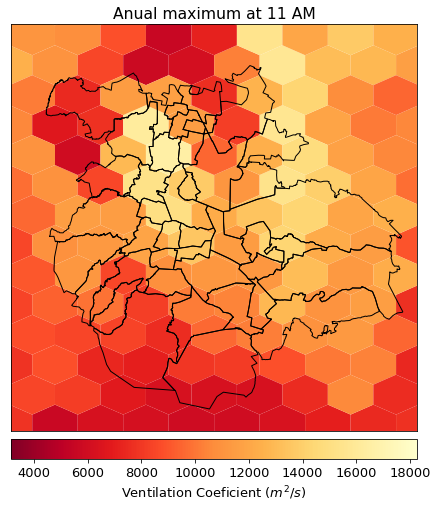

In [171]:
plt.figure(figsize = (8.6,8))
my_map = Basemap(llcrnrlon=-99.5, llcrnrlat=19,urcrnrlon=-98.6, urcrnrlat=19.9)
#http://server.arcgisonline.com/arcgis/rest/services

#my_map.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)

#my_map.readshapefile('../datos/maps/entidades/INEGI_Entidad_', 'INEGI_Entidad_')
my_map.readshapefile('../datos/maps/entidades/INEGI_Municipio_', 'INEGI_Municipio_', drawbounds=False)


for info, shape in zip(my_map.INEGI_Municipio__info, my_map.INEGI_Municipio_):
    idx_1 = info['NOMBRE'].find(', ') + 2
    
    if info['NOMBRE'][:6] == 'Ciudad':
        x, y = zip(*shape) 
        my_map.plot(x, y, marker=None, c = 'k', linewidth = 1)
        
    if info['NOMBRE'][idx_1:] in znvm_df.municipios.values:
        x, y = zip(*shape) 
        my_map.plot(x, y, marker=None, c = 'k', linewidth =1)
        
        
lons = np.reshape(xlong, 102*128)
lats = np.reshape(xlat, 102*128)

    
x,y = my_map(lons, lats)
#my_map.plot(x, y, 'bo', markersize=10)

#my_map.hexbin(x,y, C = np.reshape(mins, 102*128), gridsize=50, alpha = 1, mincnt=1, cmap='YlOrBr', linewidths=0)
#plt.colorbar()    
parallels = np.arange(19.,20.2,.2)
# labels = [left,right,top,bottom]
#my_map.drawparallels(parallels, labels=[False,True,True,False]);
#meridians = np.arange(-99.5,-98.6,.2)
#my_map.drawmeridians(meridians,labels=[True,False,False,True])

my_map.hexbin(x,y, C = np.reshape(maxs, 102*128), gridsize=30, alpha = 1, mincnt=1, linewidths=0, cmap='YlOrRd_r',)
#plt.colorbar()
plt.title('Anual maximum at 11 AM')

my_map.colorbar(location='bottom', label=r'Ventilation Coeficient ($m^2 / s$)')

In [164]:
xlong[5:20, 34:45].shape

(15, 11)

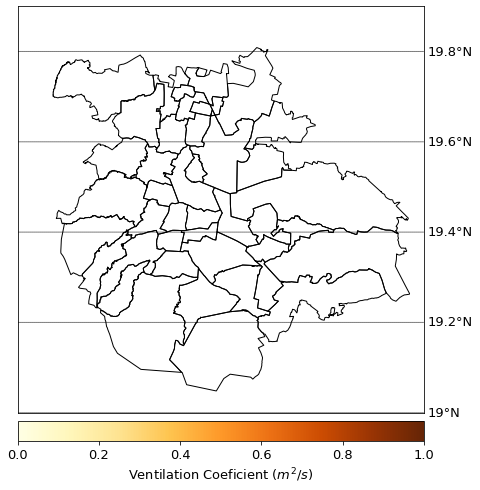

In [159]:
plt.figure(figsize = (8.6,8))
my_map = Basemap(llcrnrlon=-99.5, llcrnrlat=19,urcrnrlon=-98.6, urcrnrlat=19.9)
#http://server.arcgisonline.com/arcgis/rest/services

#my_map.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)

#my_map.readshapefile('../datos/maps/entidades/INEGI_Entidad_', 'INEGI_Entidad_')
my_map.readshapefile('../datos/maps/entidades/INEGI_Municipio_', 'INEGI_Municipio_', drawbounds=False)


for info, shape in zip(my_map.INEGI_Municipio__info, my_map.INEGI_Municipio_):
    idx_1 = info['NOMBRE'].find(', ') + 2
    
    if info['NOMBRE'][:6] == 'Ciudad':
        x, y = zip(*shape) 
        my_map.plot(x, y, marker=None, c = 'k', linewidth = 1)
        
    if info['NOMBRE'][idx_1:] in znvm_df.municipios.values:
        x, y = zip(*shape) 
        my_map.plot(x, y, marker=None, c = 'k', linewidth =1)
        
        
#lons = np.reshape(xlong, 102*128)
#lats = np.reshape(xlat, 102*128)

lons = np.reshape(xlong[5:20, 34:45], 15*11)
lats = np.reshape(xlat[5:20, 34:45], 15*11)
    
x,y = my_map(lons, lats)
#my_map.plot(x, y, 'bo', markersize=10)

#my_map.hexbin(x,y, C = np.reshape(mins, 102*128), gridsize=50, alpha = 1, mincnt=1, cmap='YlOrBr', linewidths=0)
#plt.colorbar()    
parallels = np.arange(19.,20.2,.2)
# labels = [left,right,top,bottom]
my_map.drawparallels(parallels, labels=[False,True,True,False]);
#meridians = np.arange(-99.5,-98.6,.2)
#my_map.drawmeridians(meridians,labels=[True,False,False,True])

my_map.hexbin(x,y, C = np.reshape(maxs[5:20, 34:45], 15*11), gridsize=30, alpha = 1, mincnt=1, cmap='YlOrBr', linewidths=0)
#plt.colorbar()

my_map.colorbar(location='bottom', label=r'Ventilation Coeficient ($m^2 / s$)')